In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
path_building_metadata = "building_metadata.csv"
path_weather_train = "weather_train.csv"
path_train = "train.csv"

## Building Metadata Analysis

In [3]:
building_df = pd.read_csv(path_building_metadata)
building_df.head(3)

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN


In [4]:
building_df.describe()

,site_id,building_id,square_feet,year_built,floor_count
count,1449.000000,1449.000000,1449.000000,675.000000,355.000000
mean,6.952381,724.000000,92111.776398,1967.957037,3.740845
std,5.003432,418.434583,110769.950997,31.054030,3.333683
min,0.000000,0.000000,283.000000,1900.000000,1.000000
25%,3.000000,362.000000,23012.000000,1949.000000,1.000000
50%,5.000000,724.000000,57673.000000,1970.000000,3.000000
75%,13.000000,1086.000000,115676.000000,1995.000000,5.000000
max,15.000000,1448.000000,875000.000000,2017.000000,26.000000


From the above, we notice the following:
* Both year_built and floor_count are fairly incomplete features
* Huge variability when it comes to square_feet (this suggests transforming this feature)
* median and mean for square_feet differ substantially
* There are 15 different sites
* There are 1449 different buildings

### Building Area

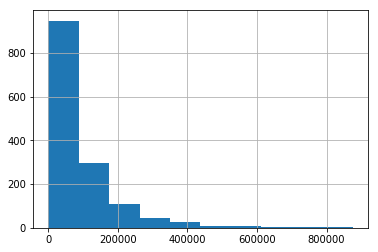

In [5]:
building_df['square_feet'].hist()

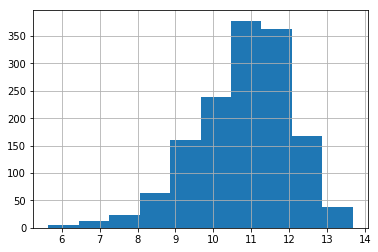

In [6]:
np.log(building_df['square_feet']).hist()

* The above is not yet quite gaussian, but better than the original variable, so we may want to consider it for modelling purposes.

In [7]:
building_df['log_square_feet'] = np.log(building_df['square_feet'])

## Floor Count

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a21a860>]],
      dtype=object)

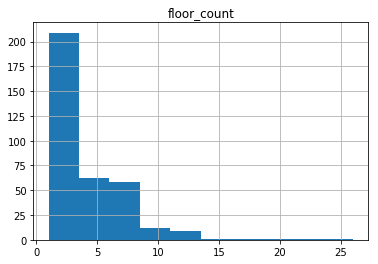

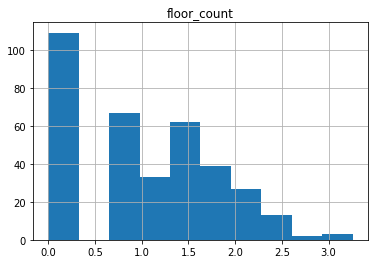

In [8]:
building_df[['floor_count']].dropna().hist()
np.log(building_df[['floor_count']].dropna()).hist()

## Year Built

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a2f9b00>]],
      dtype=object)

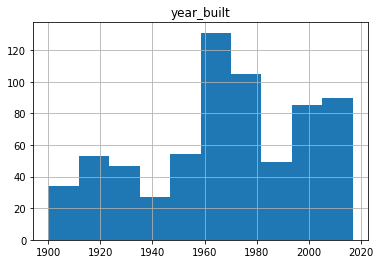

In [9]:
building_df[['year_built']].dropna().hist()

## Primary Use

In [10]:
# confirming that there are no null values for this feature
building_df['primary_use'].count()

1449

In [11]:
# Primary use categories
building_df['primary_use'].unique()

array(['Education', 'Lodging/residential', 'Office',
       'Entertainment/public assembly', 'Other', 'Retail', 'Parking',
       'Public services', 'Warehouse/storage', 'Food sales and service',
       'Religious worship', 'Healthcare', 'Utility', 'Technology/science',
       'Manufacturing/industrial', 'Services'], dtype=object)

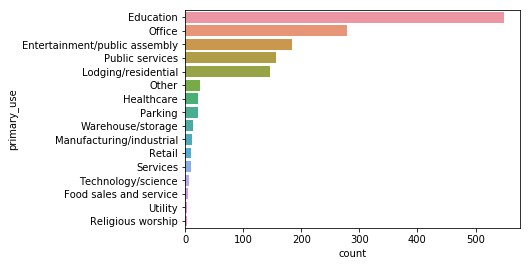

In [12]:
primary_use_count = sns.countplot(y=building_df['primary_use'],
                                  order=building_df['primary_use']\
                                    .value_counts().index)

It would be interesting to check if the square_feet / log_square_feet distribution would change substantially across the major categories outlined above.

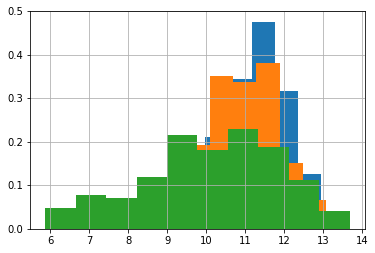

In [13]:
building_df[building_df['primary_use'] == 'Education']['log_square_feet'].hist(density='True')
building_df[building_df['primary_use'] == 'Office']['log_square_feet'].hist(density='True')
building_df[building_df['primary_use'] == 'Entertainment/public assembly']['log_square_feet'].hist(density='True')

## Correlations

In [14]:
corr_columns = list(building_df.columns)
corr_columns.remove('site_id')
corr_columns.remove('building_id')

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


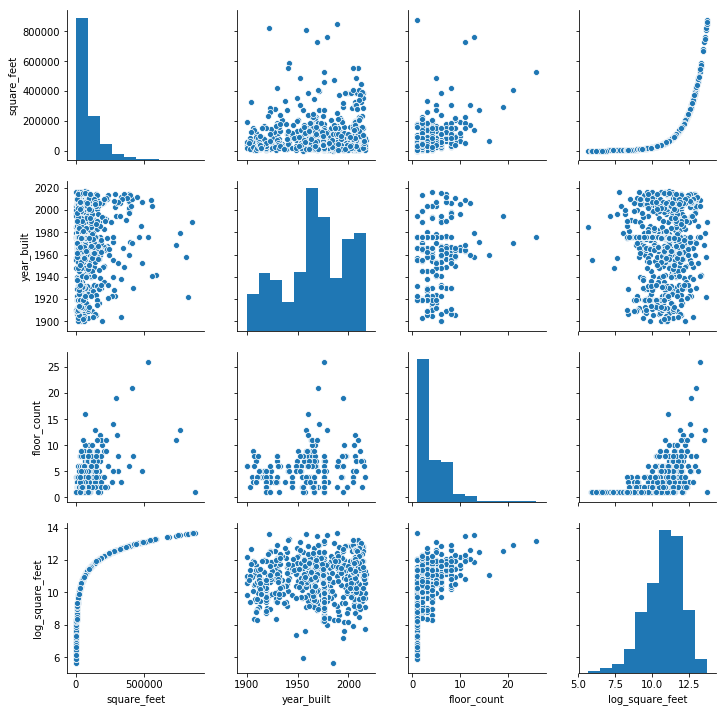

In [15]:
sns.pairplot(building_df[corr_columns])

## Building distribution across sites

In [25]:
building_df[['building_id']].duplicated().unique()
# Confirming that there are no duplicates for buildings

array([False])

In [28]:
building_df.groupby('site_id')['building_id'].count()

site_id
0     105
1      51
2     135
3     274
4      91
5      89
6      44
7      15
8      70
9     124
10     30
11      5
12     36
13    154
14    102
15    124
Name: building_id, dtype: int64

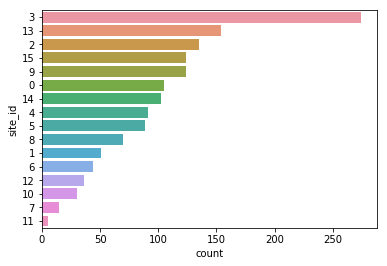

In [29]:
site_count = sns.countplot(y=building_df['site_id'],
                           order=building_df['site_id']\
                                    .value_counts().index)

In [57]:
# For later use, let's create a dictionary that relates building id to the site number
build_site_dict = {}
for i, row in building_df[['building_id']].iterrows():
    build_site_dict[row['building_id']] = building_df.loc[i,'site_id']

In [59]:
build_site_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 1,
 106: 1,
 107: 1,
 108: 1,
 109: 1,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 1,
 116: 1,
 117: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 1,
 12

# Weather Analysis

In [60]:
weather_df = pd.read_csv(path_weather_train, infer_datetime_format=True,
                         parse_dates=['timestamp'])

In [61]:
weather_df.head(5)

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [62]:
weather_df.describe()

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773.000000,139718.000000,70600.000000,139660.000000,89484.000000,129155.000000,133505.000000,139469.000000
mean,7.478977,14.418106,2.149306,7.350158,0.983047,1016.158038,180.526632,3.560527
std,4.604744,10.626595,2.599150,9.790235,8.463678,7.629684,111.523629,2.335874
min,0.000000,-28.900000,0.000000,-35.000000,-1.000000,968.200000,0.000000,0.000000
25%,3.000000,7.200000,0.000000,0.600000,0.000000,1011.800000,80.000000,2.100000
50%,7.000000,15.000000,2.000000,8.300000,0.000000,1016.400000,190.000000,3.100000
75%,11.000000,22.200000,4.000000,14.400000,0.000000,1020.800000,280.000000,5.000000
max,15.000000,47.200000,9.000000,26.100000,343.000000,1045.500000,360.000000,19.000000


KeyboardInterrupt: 

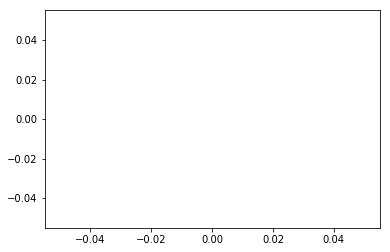

In [64]:
sns.lineplot(x=weather_df['timestamp'],
             y=weather_df['air_temperature'])

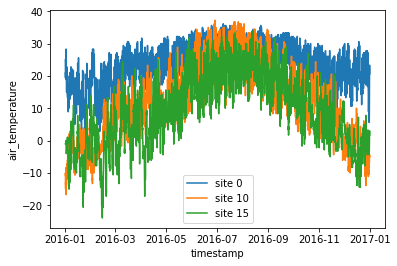

In [65]:
feature = 'air_temperature'
sites = [0, 10, 15]
for site in sites:
    sns.lineplot(x=weather_df[weather_df['site_id'] == site]['timestamp'] ,
                y=weather_df[weather_df['site_id'] == site][feature],
                label="site "+str(site))

## Cloud Coverage

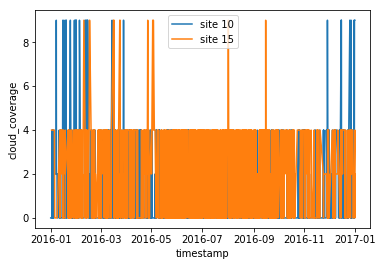

In [66]:
feature = "cloud_coverage"
#sns.lineplot(x=weather_df[weather_df['site_id'] == 0]['timestamp'] ,
 #            y=weather_df[weather_df['site_id'] == 0][feature],
  #          label="site 0")
sns.lineplot(x=weather_df[weather_df['site_id'] == 10]['timestamp'] ,
             y=weather_df[weather_df['site_id'] == 10][feature],
             label="site 10")
sns.lineplot(x=weather_df[weather_df['site_id'] == 15]['timestamp'] ,
             y=weather_df[weather_df['site_id'] == 15][feature],
            label="site 15")

## Dew Temperature

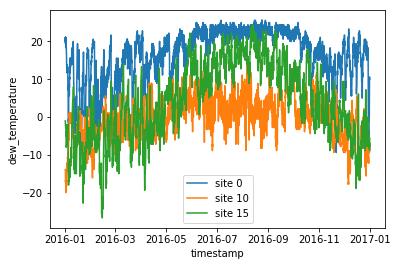

In [67]:
feature = 'dew_temperature'
sites = [0, 10, 15]
for site in sites:
    sns.lineplot(x=weather_df[weather_df['site_id'] == site]['timestamp'] ,
                y=weather_df[weather_df['site_id'] == site][feature],
                label="site "+str(site))

# Train Data

In [68]:
train_df = pd.read_csv(path_train, infer_datetime_format=True,
                         parse_dates=['timestamp'])

In [69]:
train_df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01,0.0
1,1,0,2016-01-01,0.0
2,2,0,2016-01-01,0.0
3,3,0,2016-01-01,0.0
4,4,0,2016-01-01,0.0


The same building may contain multiple meters.
The column meter indexes different meters

In [70]:
train_df[train_df['building_id'] == 0]['meter'].unique()

array([0])

In [71]:
train_df[train_df['building_id'] == 30]['meter'].unique()

array([0, 1])

In [74]:
train_df[train_df['building_id'] == 0]['meter'].count()

8784

In [73]:
train_df[train_df['building_id'] == 30]['meter'].count()

16053

That is the reason why a building like 30 has way more rows associated with it.
Thus, whenever we plot something, we will have to specify also the meter number.
Let's start investigating site number 11, since it has only a few buildings.

In [76]:
#First step is to add a site_id column
#Here we will use the dictionary we defined previously

train_df['site_id'] = train_df['building_id'].apply(lambda x: build_site_dict[x])

In [79]:
building_indices = train_df[train_df['site_id'] == 11]['building_id'].unique()

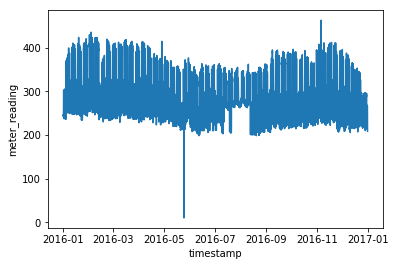

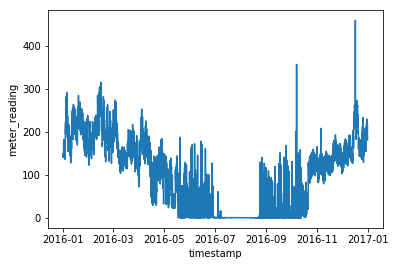

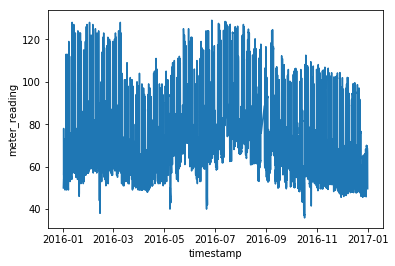

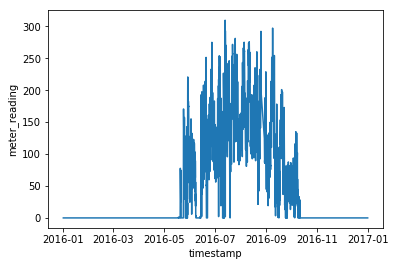

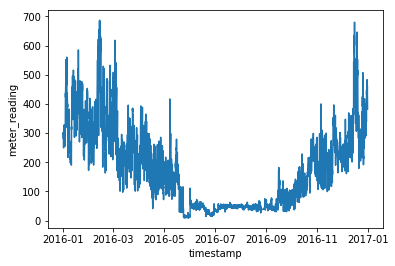

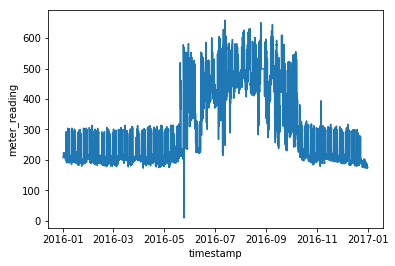

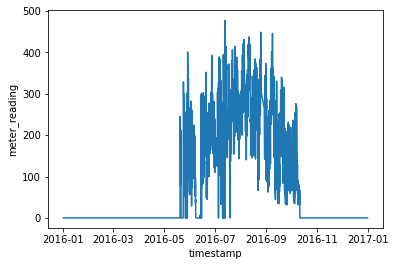

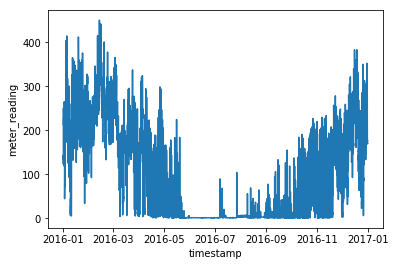

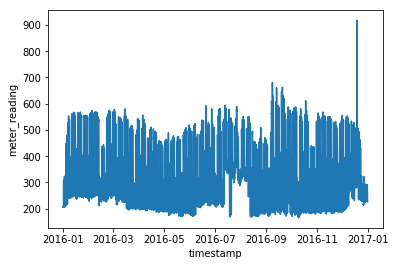

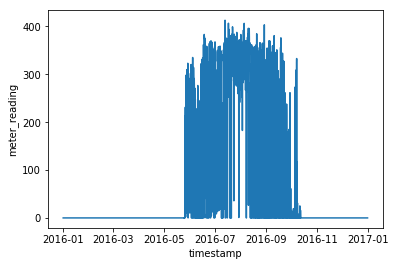

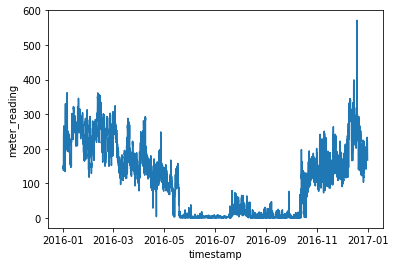

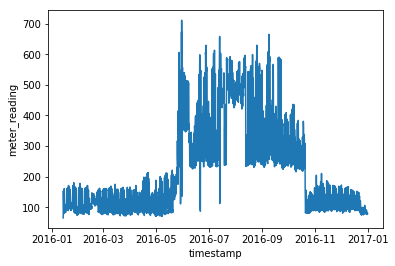

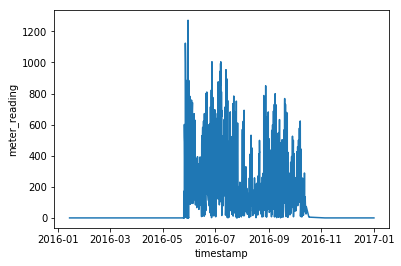

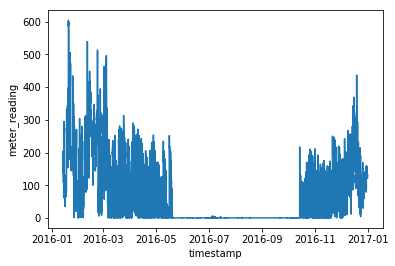

In [84]:
for i in building_indices:
    meter_indices = train_df[train_df['building_id'] == i]['meter'].unique()
    for j in meter_indices:
        sns.lineplot(x=train_df[(train_df['building_id'] == i) & (train_df['meter'] == j)]['timestamp'],
                     y=train_df[(train_df['building_id'] == i) & (train_df['meter'] == j)]['meter_reading'])
        plt.show()

In [56]:
build30_df['meter_reading'].isna().unique()

array([False])